In [1]:
%matplotlib inline
import numpy as np

from astropy.io import fits
from astropy import units as u
from astropy.wcs import WCS
from astropy.table import Table, join, vstack

import matplotlib
import matplotlib.pyplot as plt

import math

In [2]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18

In [3]:
name = '9881-12705'
cube = 'manga-'+name+'.Pipe3D.cube.fits'

M_cube = fits.open(cube)

In [4]:
M_cube.info()

Filename: manga-9881-12705.Pipe3D.cube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  ORG_HDR       1 PrimaryHDU      97   ()      
  1  SSP           1 ImageHDU       118   (74, 74, 21)   float64   
  2  SFH           1 ImageHDU      1608   (74, 74, 319)   float64   
  3  INDICES       1 ImageHDU        31   (74, 74, 18)   float64   
  4  ELINES        1 ImageHDU        68   (74, 74, 11)   float64   
  5  FLUX_ELINES    1 ImageHDU      1382   (74, 74, 456)   float64   
  6  FLUX_ELINES_LONG    1 ImageHDU      4622   (74, 74, 1536)   float64   
  7  GAIA_MASK     1 ImageHDU        28   (74, 74)   float64   
  8  SELECT_REG    1 ImageHDU        10   (74, 74)   float64   


In [5]:
M_cube[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
AUTHOR  = 'Brian Cherinka & David Law <bcherinka@stsci.edu, dlaw@stsci.edu>' /  
VERSDRP2= 'v3_1_1  '           / MaNGA DRP version (2d processing)              
VERSDRP3= 'v3_1_1  '           / MaNGA DRP Version (3d processing)              
VERSPLDS= 'v5_1    '           / Platedesign Version                            
VERSFLAT= 'v1_33   '           / Specflat Version                               
VERSCORE= 'v1_9_1  '           / MaNGAcore Version                              
VERSPRIM= 'v2_9    '           / MaNGA Preimaging Version                       
VERSUTIL= 'v5_5_36 '           / Version of idlutils                            
VERSIDL = 'x86_64 linux unix

In [6]:
wcs = WCS(M_cube[0])
wcs

a string value was expected. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  'LINEAR'  
CRVAL : 205.37357  23.166964  3622.0  
CRPIX : 38.0  38.0  1.0  
CD1_1 CD1_2 CD1_3  : -0.000138889  0.0  0.0  
CD2_1 CD2_2 CD2_3  : 0.0  0.000138889  0.0  
CD3_1 CD3_2 CD3_3  : 0.0  0.0  1.5  
NAXIS : 0  0

### Explorando cada cubo

In [28]:
M_cube_SSP = M_cube[1]
M_cube_SFH = M_cube[2]
M_cube_IND = M_cube[3]
M_cube_EL = M_cube[4]
M_cube_FE = M_cube[5]

In [11]:
M_cube_SSP.header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   74                                                  
NAXIS2  =                   74                                                  
NAXIS3  =                   21                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
PIPELINE= 'pyFIT3D v1.0.0'                                                      
UNIXTIME=           1609236676 / 2020-12-29 04:11:16.579933                     
OBJECT  = 'manga-9881-12705'                                                    
ID_0    =                    1                                                  
FILE_0  = 'manga-9881-12705.

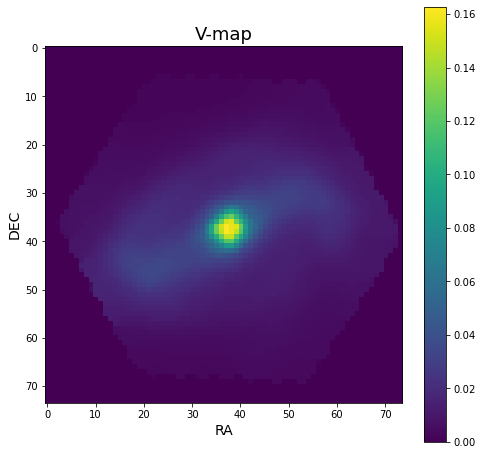

In [12]:
V_map_data = M_cube_SSP.data
V_map = V_map_data[0,:,:]

cmap = 'viridis'

plt.figure(figsize = (8,8))
#plt.subplot(projection=wcs, slices('x', 'y', 3622))
cax = plt.imshow(V_map, cmap = cmap)

plt.xlabel('RA')
plt.ylabel('DEC')
#plt.gca().invert_yaxis()
plt.title(r'V-map')
plt.colorbar()

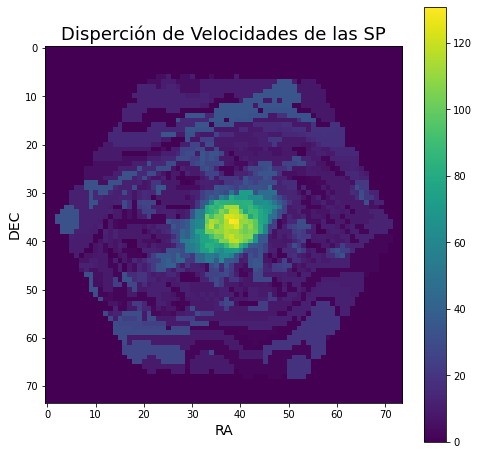

In [13]:
vel_disp_SP_data = M_cube_SSP.data
vel_disp_SP = vel_disp_SP_data[15,:,:]

cmap = 'viridis'

plt.figure(figsize = (8,8))
#plt.subplot(projection=wcs, slices('x', 'y', 3622))
cax = plt.imshow(vel_disp_SP, cmap = cmap)

plt.xlabel('RA')
plt.ylabel('DEC')
#plt.gca().invert_yaxis()
plt.title(r'Disperción de Velocidades de las SP')
plt.colorbar()

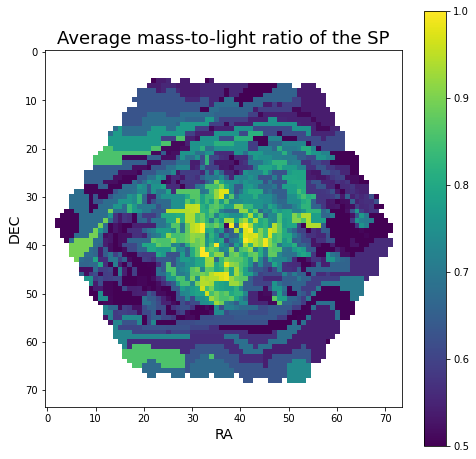

In [14]:
av_m_L_SP_data = M_cube_SSP.data
av_m_L_SP = av_m_L_SP_data[17,:,:]

cmap = 'viridis'

plt.figure(figsize = (8,8))
#plt.subplot(projection=wcs, slices('x', 'y', 3622))
cax = plt.imshow(av_m_L_SP, cmap = cmap,  vmin = 0.5, vmax = 1)

plt.xlabel('RA')
plt.ylabel('DEC')
#plt.gca().invert_yaxis()
plt.title(r'Average mass-to-light ratio of the SP')
plt.colorbar()

### Cubo de la SFH

In [15]:
#
M_cube_SFH.header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   74                                                  
NAXIS2  =                   74                                                  
NAXIS3  =                  319                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
PIPELINE= 'pyFIT3D v1.0.0'                                                      
UNIXTIME=           1609236689 / 2020-12-29 04:11:29.780973                     
OBJECT  = 'manga-9881-12705'                                                    
ID_0    =                    1                                                  
FILE_0  = 'map.CS.manga-9881

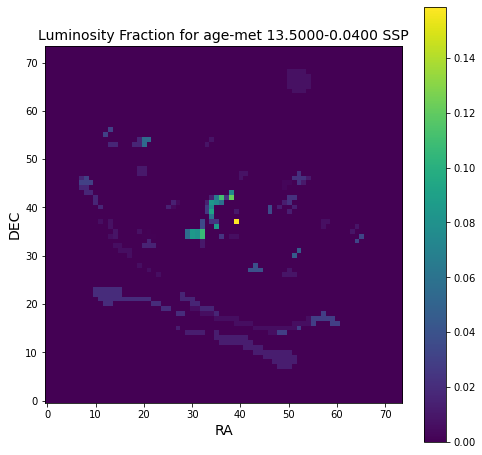

In [16]:
age_SSP_data = M_cube_SFH.data
age_SSP = age_SSP_data[272,:,:]

cmap = 'viridis'

plt.figure(figsize = (8,8))
#plt.subplot(projection=wcs, slices = ('x', 'y', 3622))
cax = plt.imshow(age_SSP, cmap = cmap)

plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_yaxis()
plt.title(r''+ M_cube_SFH.header['DESC_272']+'', size = '14')
plt.colorbar()

### Cubo de los indices

In [17]:
M_cube_IND.header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   74                                                  
NAXIS2  =                   74                                                  
NAXIS3  =                   18                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
FILENAME= 'indices.CS.manga-9881-12705.cube.fits'                               
INDEX0  = 'Hd      '                                                            
INDEX1  = 'Hb      '                                                            
INDEX10 = 'e_Hb    '                                                            
INDEX11 = 'e_Mgb   '        

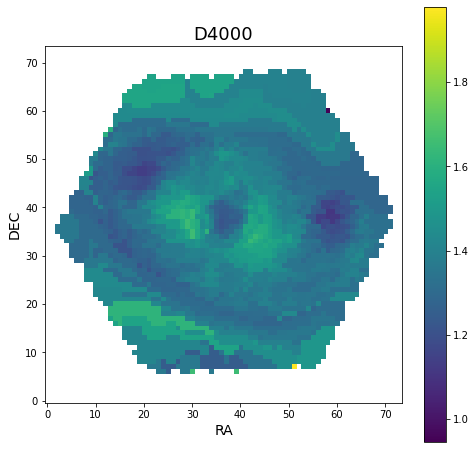

In [18]:
D4000_data = M_cube_IND.data
D4000 = D4000_data[5,:,:]

cmap = 'viridis'

plt.figure(figsize = (8,8))
#plt.subplot(projection=wcs, slices = ('x', 'y', 3622))
cax = plt.imshow(D4000, cmap = cmap)

plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_yaxis()
plt.title(r'D4000')
plt.colorbar()

### Cubo de las líneas de emisión

In [19]:
M_cube_EL.header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   74                                                  
NAXIS2  =                   74                                                  
NAXIS3  =                   11                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
PIPELINE= 'pyFIT3D v1.0.0'                                                      
UNIXTIME=           1609236676 / 2020-12-29 04:11:16.829883                     
OBJECT  = 'manga-9881-12705'                                                    
ID_0    =                    1                                                  
FILE_0  = 'map.6530_6630.man

<ipython-input-20-cbfa1b5147f2>:9: RuntimeWarning: divide by zero encountered in log
  cax = plt.imshow(np.log(vel_Ha), cmap=cmap)


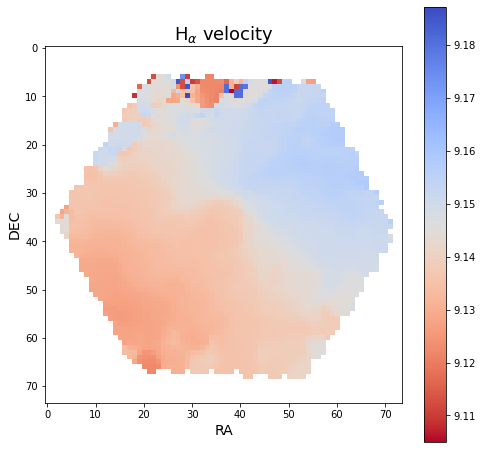

In [20]:
vel_Ha_data = M_cube_EL.data
vel_Ha = vel_Ha_data[0,:,:]

cmap = 'coolwarm_r'

plt.figure(figsize=(8,8))
#plt.subplot(projection=wcs, slices=('x', 'y', 3622))
#cax = plt.imshow(vel_Ha, cmap=cmap)
cax = plt.imshow(np.log(vel_Ha), cmap=cmap)


plt.xlabel('RA')
plt.ylabel('DEC')
#plt.gca().invert_yaxis()
plt.title(r'H${_\alpha}$ velocity')
plt.colorbar()

<ipython-input-21-44a0efa8054c>:9: RuntimeWarning: divide by zero encountered in log
  cax = plt.imshow(np.log(F_OIII), cmap=cmap)
<ipython-input-21-44a0efa8054c>:9: RuntimeWarning: invalid value encountered in log
  cax = plt.imshow(np.log(F_OIII), cmap=cmap)


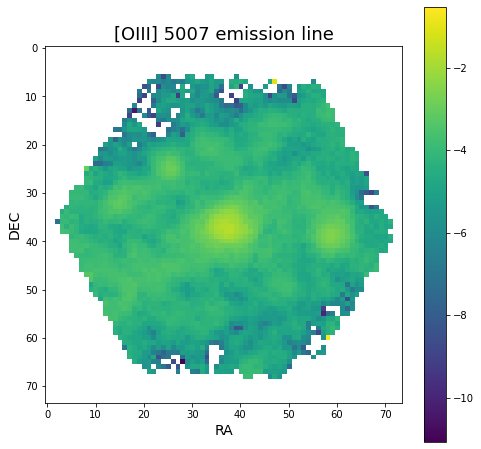

In [21]:
F_OIII_data = M_cube_EL.data
F_OIII = F_OIII_data[3,:,:]

cmap = 'viridis'

plt.figure(figsize=(8,8))
#plt.subplot(projection=wcs, slices=('x', 'y', 3622))
#cax = plt.imshow(F_OIII, cmap=cmap)
cax = plt.imshow(np.log(F_OIII), cmap=cmap)


plt.xlabel('RA')
plt.ylabel('DEC')
#plt.gca().invert_yaxis()
plt.title(r'[OIII] 5007 emission line')
plt.colorbar()

<ipython-input-22-4589602e09ca>:9: RuntimeWarning: divide by zero encountered in log
  cax = plt.imshow(np.log(F_Hb), cmap=cmap)
<ipython-input-22-4589602e09ca>:9: RuntimeWarning: invalid value encountered in log
  cax = plt.imshow(np.log(F_Hb), cmap=cmap)


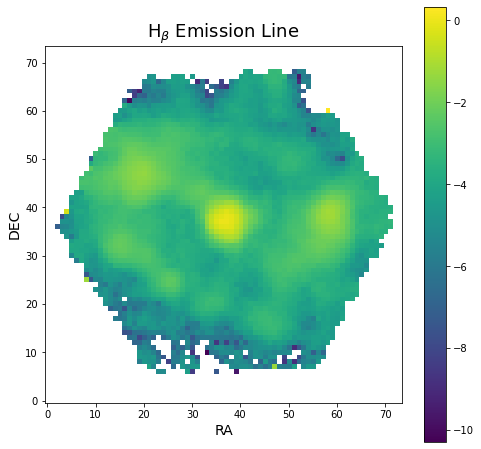

In [22]:
F_Hb_data = M_cube_EL.data
F_Hb = F_Hb_data[5,:,:]

cmap = 'viridis'

plt.figure(figsize=(8,8))
#plt.subplot(projection=wcs, slices=('x', 'y', 3622))
#cax = plt.imshow(F_Hb, cmap=cmap)
cax = plt.imshow(np.log(F_Hb), cmap=cmap)

plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_yaxis()
plt.title(r'H${_\beta}$ Emission Line')
plt.colorbar()

<ipython-input-23-0e54928b3d08>:9: RuntimeWarning: divide by zero encountered in log
  cax = plt.imshow(np.log(F_Ha), cmap=cmap)
<ipython-input-23-0e54928b3d08>:9: RuntimeWarning: invalid value encountered in log
  cax = plt.imshow(np.log(F_Ha), cmap=cmap)


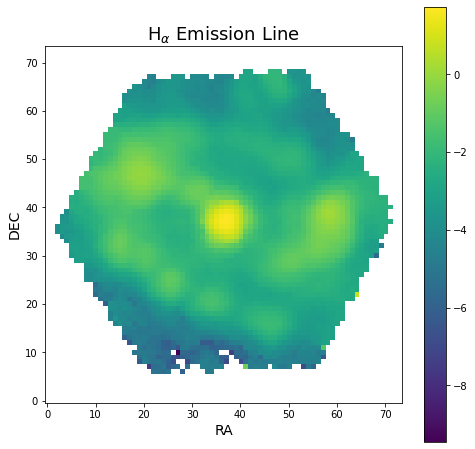

In [23]:
F_Ha_data = M_cube_EL.data
F_Ha = F_Ha_data[6,:,:]

cmap = 'viridis'

plt.figure(figsize=(8,8))
#plt.subplot(projection=wcs, slices=('x', 'y', 3622))
#cax = plt.imshow(F_Ha, cmap=cmap)
cax = plt.imshow(np.log(F_Ha), cmap=cmap)

plt.xlabel('RA')
plt.ylabel('DEC')
plt.gca().invert_yaxis()
plt.title(r'H${_\alpha}$ Emission Line')
plt.colorbar()

### Cubo de los flujos de emisión

In [29]:
M_cube_FE.header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                   74                                                  
NAXIS2  =                   74                                                  
NAXIS3  =                  456                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
PIPELINE= 'pyFIT3D v1.0.0'                                                      
UNIXTIME=           1617049881 / 2021-03-29 14:31:21.082879                     
CRVAL3  =                 3622                                                  
CRPIX3  =                  1.0                                                  
CDELT3  =                  1

In [30]:
FE_data = M_cube_FE.data

In [31]:
tab_FE = Table()
tab_FE.add_column(FE_data[0:56,:,:], name='FE')

In [32]:
#print(tab_FE)
#print(len(tab_FE))

<ipython-input-33-7fde7ff65dc1>:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(tab_FE['FE'][45]))
<ipython-input-33-7fde7ff65dc1>:2: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(tab_FE['FE'][45]))


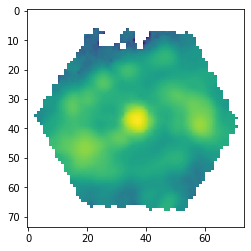

In [33]:
#plt.imshow(tab_FE['FE'][45])
plt.imshow(np.log(tab_FE['FE'][45]))

<ipython-input-34-a191b49b0980>:12: RuntimeWarning: divide by zero encountered in log
  ax[ix][iy].imshow(np.log(tab_FE['FE'])[ind], label = title)
<ipython-input-34-a191b49b0980>:12: RuntimeWarning: invalid value encountered in log
  ax[ix][iy].imshow(np.log(tab_FE['FE'])[ind], label = title)


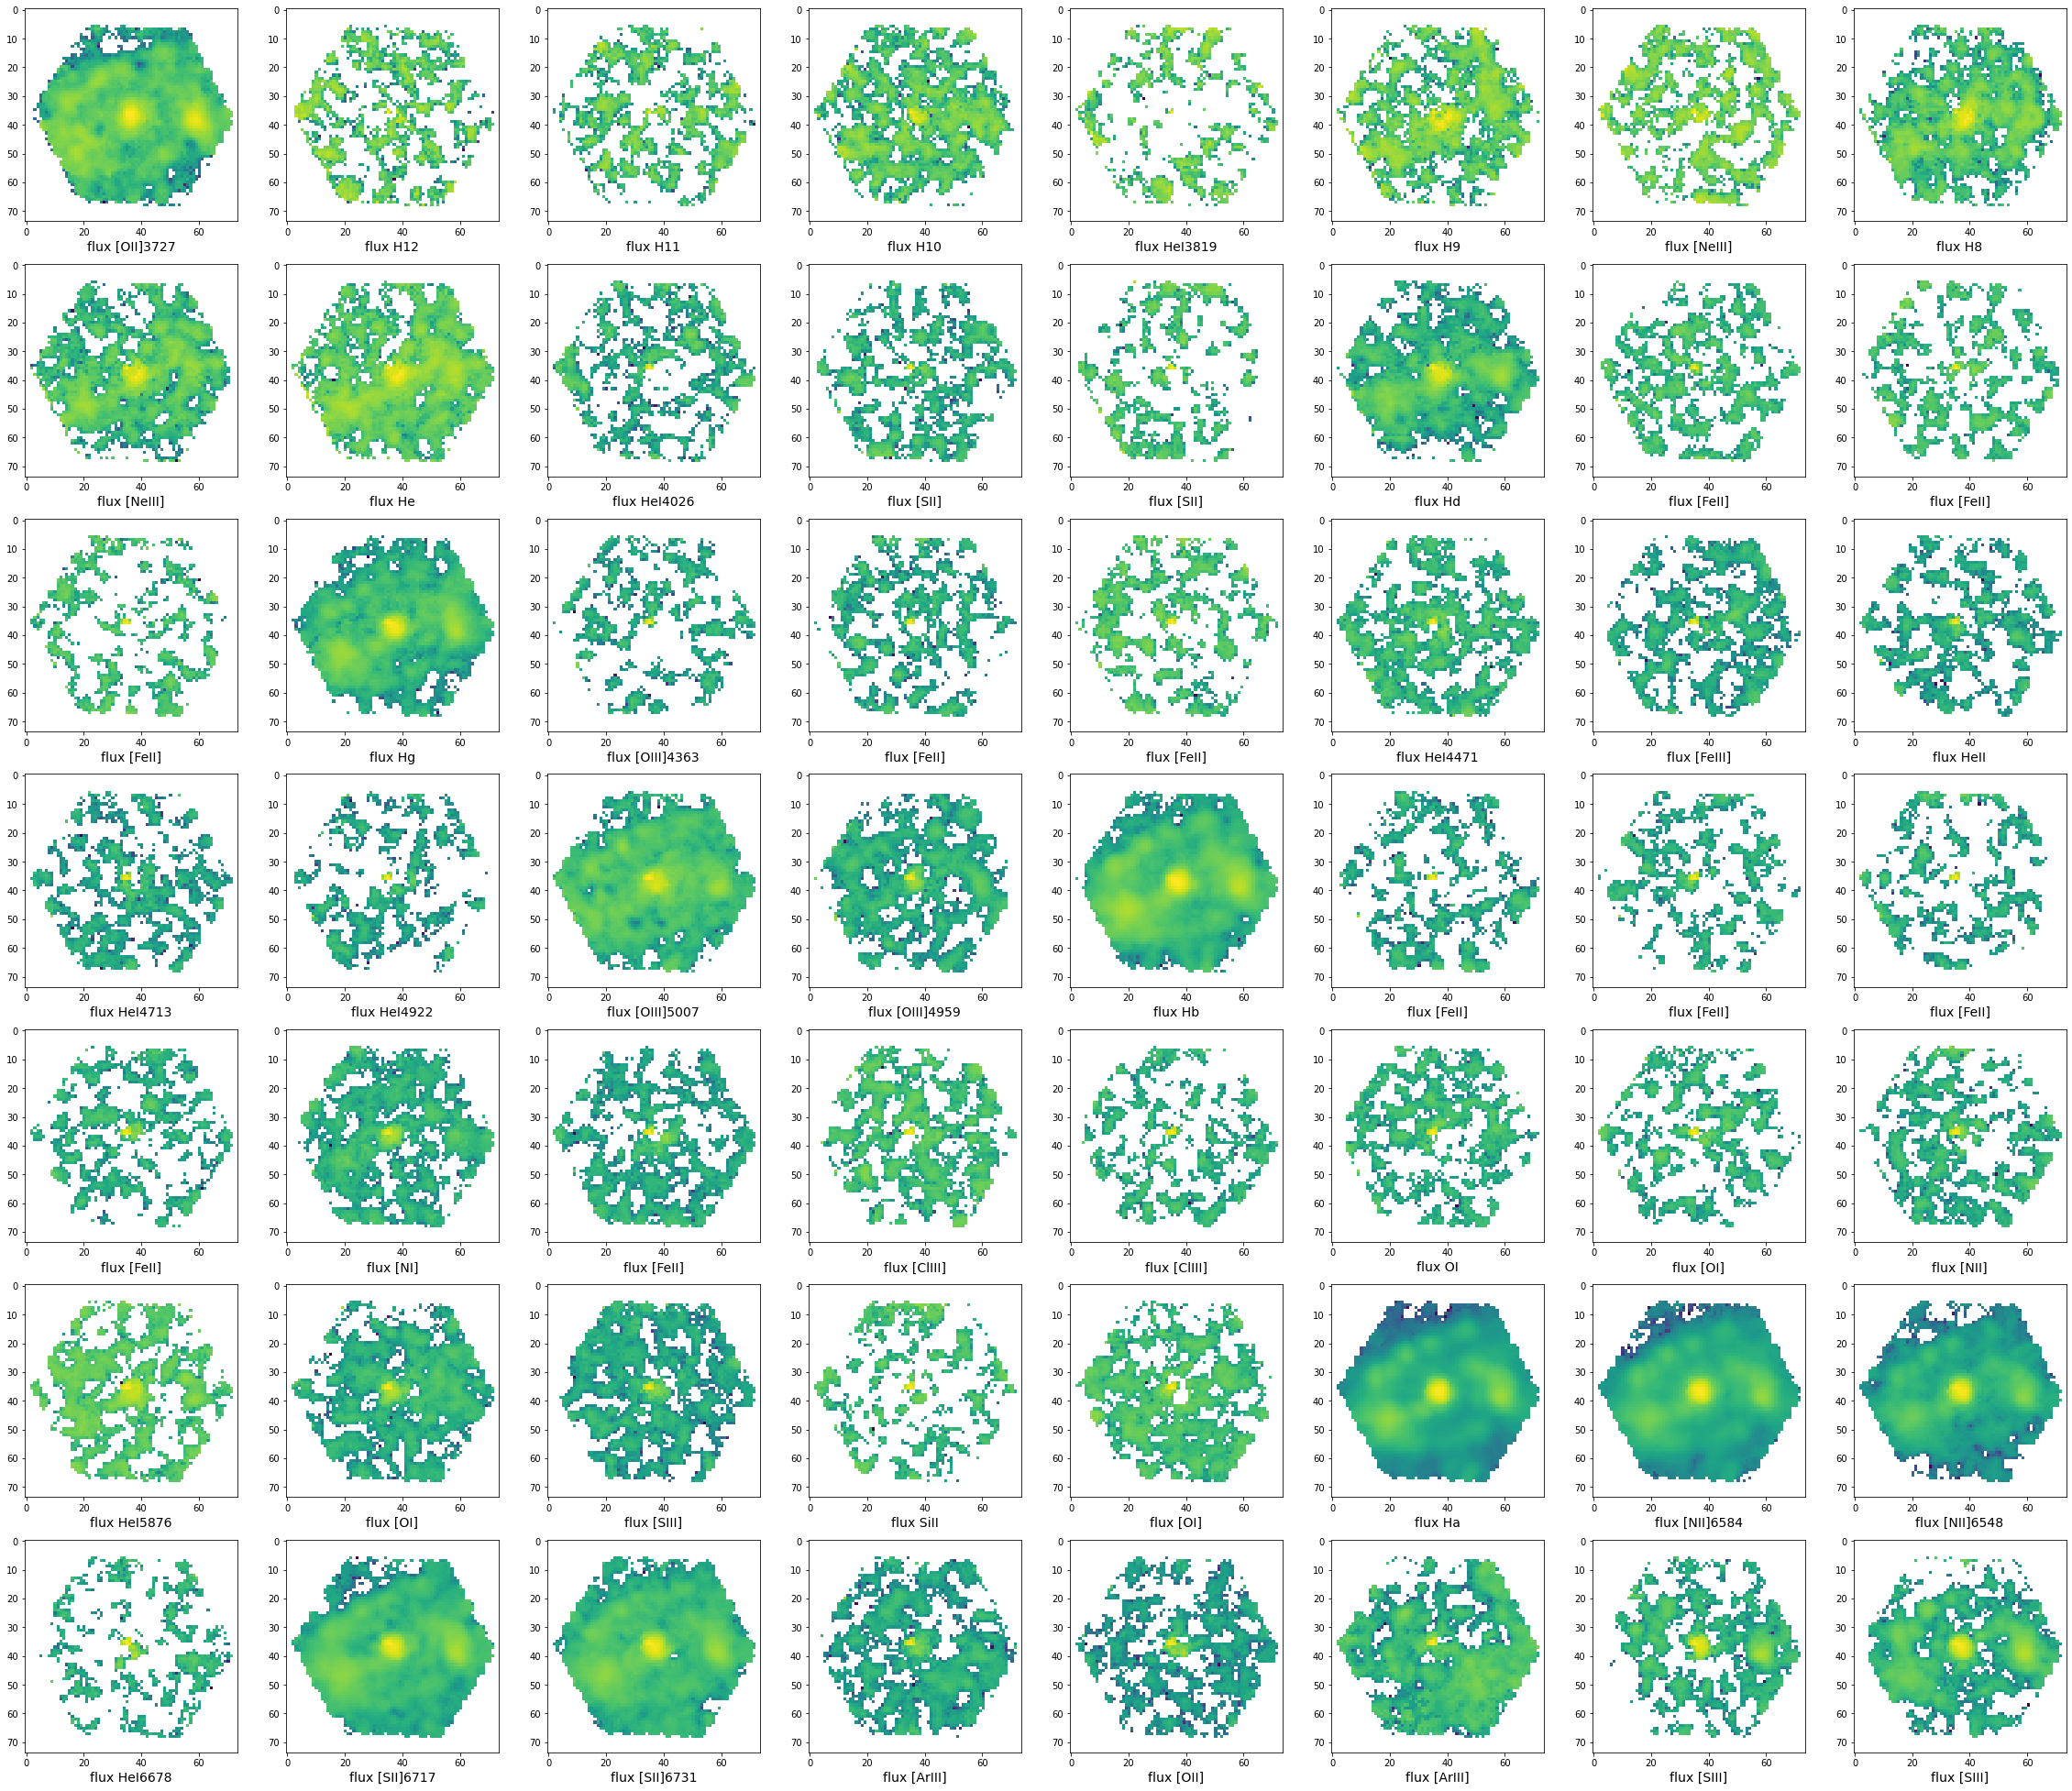

In [34]:
nx_a=7
ny_a=8
scl=5
fig,ax = plt.subplots(nx_a,ny_a,figsize=(ny_a*scl,nx_a*scl))

ind=0
for ix in np.arange(0,nx_a):
    for iy in np.arange(0,ny_a):
        if (ind<len(tab_FE)):
            title=f"{M_cube_FE.header['NAME'+str(ind)]}"
            #ax[ix][iy].imshow(tab_FE['FE'][ind], label = title)
            ax[ix][iy].imshow(np.log(tab_FE['FE'])[ind], label = title)
            ax[ix][iy].set_xlabel(title)
        ind=ind+1

In [35]:
Ha = FE_data[45,:,:]
Ha

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
Hb = FE_data[28,:,:]
#Hb

In [37]:
OIII = FE_data[26,:,:]
#OIII

In [38]:
NII = FE_data[46,:,:]
#NII

In [39]:
EW_Ha = FE_data[216,:,:]
#EW_Ha

In [40]:
log_OIII_Hb = np.log(OIII/Hb)

<ipython-input-40-9a5b2d752b6c>:1: RuntimeWarning: invalid value encountered in divide
  log_OIII_Hb = np.log(OIII/Hb)
<ipython-input-40-9a5b2d752b6c>:1: RuntimeWarning: invalid value encountered in log
  log_OIII_Hb = np.log(OIII/Hb)


In [41]:
log_NII_Ha = np.log(NII/Ha)

<ipython-input-41-e1af9c25fa75>:1: RuntimeWarning: invalid value encountered in divide
  log_NII_Ha = np.log(NII/Ha)
<ipython-input-41-e1af9c25fa75>:1: RuntimeWarning: invalid value encountered in log
  log_NII_Ha = np.log(NII/Ha)


<ipython-input-42-048e54d9cac5>:22: RuntimeWarning: divide by zero encountered in log
  sc = ax.scatter(log_NII_Ha, log_OIII_Hb, c=np.log(np.abs(EW_Ha)), cmap='coolwarm_r')


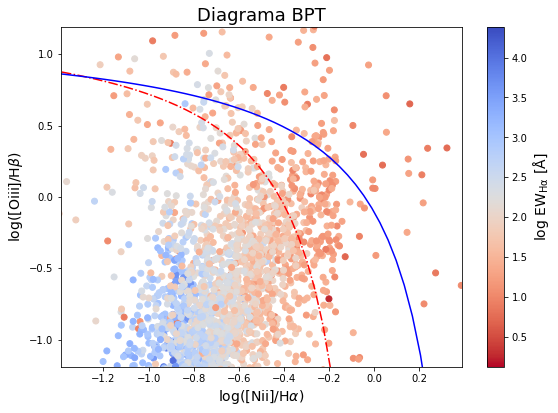

In [42]:
fig, ax = plt.subplots(1,figsize=(9,6.25))
color_cm_now='coolwarm_r'

x_min1=-1.39
x_max1=0.39
y_min1=-1.19
y_max1=1.19

x=np.linspace(2*x_min1,2*x_max1,100)
cut_y=-0.7+0.2-3.67*x
cut_y2=-1.7+0.5-3.67*x
cut_y3=0.61/(x-0.05)+1.3
cut_y4=0.61/(x-0.47)+1.19
cut_y_SII=0.61/(x-0.3)+1.3;
cut_y_SII_AGNs=1.89*(x)+0.76;
cut_y_OI=0.73/((x+0.59))+1.33;#+1.10;
cut_y_OI_AGNs=1.18*(x)+1.30;
cut_y_OIII_AGNs=1.14*(x)+0.36;

###Datos de la tabla

sc = ax.scatter(log_NII_Ha, log_OIII_Hb, c=np.log(np.abs(EW_Ha)), cmap='coolwarm_r') 

### Límites de Kewley (solid line) y Kauffmann (dotted line)

ax.plot(x[x<0],cut_y3[x<0],'r-.')
ax.plot(x,cut_y4,'b-')

### Límites de las líneas y configuración de las gráficas

ax.set_ylabel(r'log([Oiii]/H$\beta$)')
ax.set_xlabel(r'log([Nii]/H$\alpha$)')
ax.set_xlim(x_min1,x_max1)
ax.set_ylim(y_min1,y_max1)
plt.subplots_adjust(wspace=0)

cbar = fig.colorbar(sc)
cbar.set_label(r'log EW$_{\rm H\alpha}$ [${\rm \AA}]$', loc='center')

ax.set_title('Diagrama BPT')

plt.show()